In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Cuadrados Minimos Lineales

In [15]:
def CM_lineales(xi, yi):
    if len(xi) == len(yi):
        
        N = len(xi)
        delta = (N * np.sum(xi**2)) - (np.sum(xi) * np.sum(yi))
        sigma_y = np.std(yi)

        #Definimos la pendiente
        def a(xi, yi):
            numerador_a = (N * np.sum(xi * yi)) - ((np.sum(xi)) * (np.sum(yi)))
            pendiente = numerador_a/delta
            
            #Estimo su incerteza
            error_pendiente = sigma_y * np.sqrt(N/delta)
            
            return pendiente, error_pendiente
        
        #Definimos el parametro b
        def b(xi,yi):
            numerador_b = (np.sum(xi**2))*(np.sum(yi)) - (np.sum(xi)*np.sum(xi*yi))
            ordenada = numerador_b/delta 
            
            #Estimo su incerteza
            error_ordenda = sigma_y * np.sqrt((np.sum(xi**2))/delta)
            return ordenada, error_ordenda
        
        #Definimos f(xi)
        def f(xi,yi): return a(xi,yi)[0] * xi + b(xi,yi)[0]

        return f(xi, yi), a(xi, yi), b(xi, yi)
    else:
        return print('El largo de la lista de "x" es distinta al largo de la lista de "y"')

# Cuadrados Minimos lineales ponderados

In [16]:
def CM_ponderados(xi, yi, sigma_yi):
    #Defino variables
    wi = 1 / (sigma_yi**2)
    delta_ponderados = (np.sum(wi) * np.sum(wi * xi**2)) - np.sum(wi*xi)**2
    
    #Comparo el largo de los datos
    if len(xi) == len(yi):
        #definimos el parametro a
        def ap(xi, yi):
            numerador_a = (np.sum(wi) * np.sum(xi * yi * wi)) - ((np.sum(xi * wi)) * (np.sum(yi * wi)))
            pendiente = numerador_a / delta_ponderados
            error_pendiente = np.sqrt(np.sum(wi) / delta_ponderados)
            
            return pendiente, error_pendiente

        #definimos el parametro b
        def bp(xi,yi):
            numerador_b = (np.sum(wi * (xi**2))) * (np.sum(wi * yi)) - (np.sum(xi * wi) * np.sum(xi * yi * wi))
            ordenada = numerador_b / delta_ponderados 
            error_ordenada = np.sqrt((np.sum(wi * xi**2)) / delta_ponderados)

            return ordenada, error_ordenada

        #definimos f(xi)= axi + b
        def fp(xi,yi): return ap(xi,yi)[0]* xi + bp(xi,yi)[0]
        
        #Return de Cuadraados Minimos Ponderados
        return fp(xi, yi), ap(xi,yi), bp(xi,yi)
    else:
        return print('El largo de las listas es distinta')

## Testeo de Cuadrados Mínimos ponderados

Los datos de mis ajustes son: (array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), (1.0, 0.31622776601683805), (0.0, 1.9621416870348594))


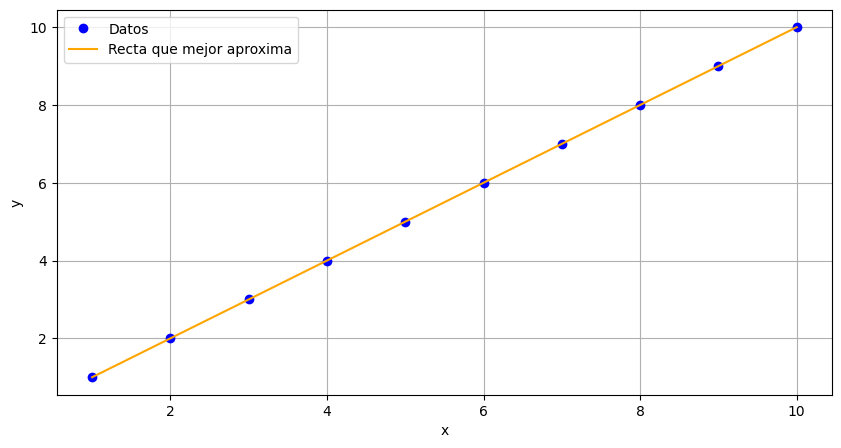

In [17]:
#Cargo Datos
x = np.arange(1,11)
y = x
ajuste = CM_ponderados(x, y, np.array([np.std(y)]*10))
print(f'Los datos de mis ajustes son: {ajuste}')

#Hago un plot para verificar:
plt.figure(figsize=(10,5))
plt.plot(x, y, 'bo', label='Datos')
plt.plot(x, ajuste[0], color='orange', label='Recta que mejor aproxima')

plt.xlabel('x')
plt.ylabel('y')

plt.grid()
plt.legend()
plt.show()

## Testeo de Cuadrados Mínimos

Los datos de mis ajustes son: (array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), (1.0, 0.30151134457776363), (0.0, 1.7837651700316897))


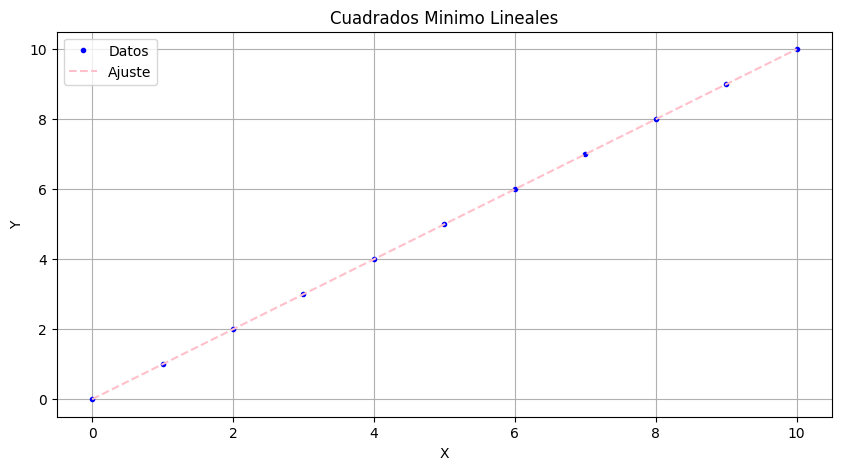

In [18]:
#Creo datos
x = np.arange(0,11)
y = x

#Creo el ajuste
ajuste = CM_lineales(x, y)
print(f'Los datos de mis ajustes son: {ajuste}')
#Realizo un plot
plt.figure(figsize=(10,5))
plt.plot(x, y, 'b.',label=('Datos'))
plt.plot(x, ajuste[0], color='pink', linestyle='--',label=('Ajuste'))

plt.title('Cuadrados Minimo Lineales')
plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
plt.grid()
plt.show()